# LAB 12 - REGULARIZATION

This lab comprises 2 main sections:

 - 1. EDA and Feature Engineering
 
 - 2. Regression Analysis and Regularization Methods

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
ames = pd.read_csv('Ames.csv')

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
#ames.info()

# --------------------Beginning of Part I----------------------------

# 1. EDA and Feature Engineering

### 1.1 Basic cleaning and EDA

#### 1.1.1 Dependent Variable

a) A quick visualization of the dependent variable

<Figure size 576x432 with 0 Axes>

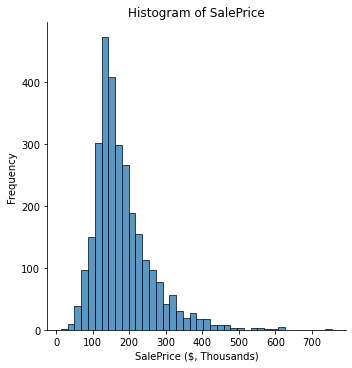

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [57]:
plt.figure(figsize=(8,6))
ax = sns.displot(ames['SalePrice']/1000, bins=40)

plt.xlabel('SalePrice ($, Thousands)')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice')

plt.show()
ames['SalePrice'].describe()

b. Log transformation: Let's take log to be more fair in comparing high vs. low price homes.

In [58]:
ames['LogSalePrice'] = ames['SalePrice'].apply(np.log)
ames.drop(columns='SalePrice', inplace=True)

<Figure size 576x432 with 0 Axes>

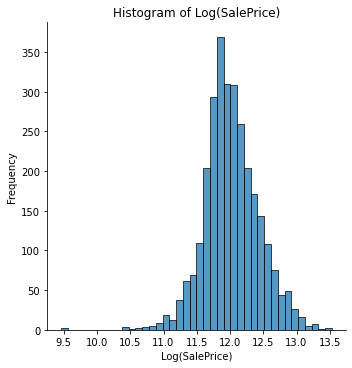

count    2930.000000
mean       12.020969
std         0.407587
min         9.456341
25%        11.771436
50%        11.982929
75%        12.271392
max        13.534473
Name: LogSalePrice, dtype: float64

In [59]:
plt.figure(figsize=(8,6))
ax = sns.displot(ames['LogSalePrice'], bins=40)

plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')
plt.title('Histogram of Log(SalePrice)')

plt.show()
ames['LogSalePrice'].describe()

#### 1.1.2 Independent Variables

a) Column Names: One of the column names contains a dot. We rename it to avoid any problem:

In [60]:
ames.rename(columns={'YearRemod.Add':'YearRemodAdd'}, inplace=True)

b) Move the new dependent variable (LogSalePrice) to the first column

In [61]:
ames = ames[[ames.columns[-1]] + list(ames.columns)[:-1] ]

### 1.2 More cleaning: Combine the information from two columns

#### 1.2.1 Fix Condition variables

Convert condition variables into dummy variables. We look at both `Condition1` or `Condition2` to decide which conditions each home belongs to. 

In [62]:
print(np.unique(ames['Condition1']))
print(np.unique(ames['Condition2']))

['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNn']


In [63]:
condition_dummy=np.unique(ames['Condition1'])
# In the line above, we implicitly treate 'Norm' as the reference level
ames[condition_dummy]=0

for i in condition_dummy:
    print(i)
    ames.loc[(ames['Condition1']==i) | (ames['Condition2']==i), i]=1

ames.drop(columns=['Condition1', 'Condition2'], inplace=True)

Artery
Feedr
Norm
PosA
PosN
RRAe
RRAn
RRNe
RRNn


#### 1.2.2 Encode Exterior Variables 

Same treatment as with condition variables

In [64]:
print(np.unique(ames['Exterior1st']))
print(np.unique(ames['Exterior2nd']))

['AsbShng' 'AsphShn' 'BrkComm' 'BrkFace' 'CBlock' 'CemntBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Plywood' 'PreCast' 'Stone' 'Stucco' 'VinylSd'
 'Wd Sdng' 'WdShing']
['AsbShng' 'AsphShn' 'Brk Cmn' 'BrkFace' 'CBlock' 'CmentBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Other' 'Plywood' 'PreCast' 'Stone' 'Stucco'
 'VinylSd' 'Wd Sdng' 'Wd Shng']


In [65]:
# Remove the space in each level to avoid errors in column names later on.
ames['Exterior1st'] = ames['Exterior1st'].str.replace(' ','')
ames['Exterior2nd'] = ames['Exterior2nd'].str.replace(' ','')
print(np.unique(ames['Exterior1st']))
print(np.unique(ames['Exterior2nd']))

['AsbShng' 'AsphShn' 'BrkComm' 'BrkFace' 'CBlock' 'CemntBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Plywood' 'PreCast' 'Stone' 'Stucco' 'VinylSd'
 'WdSdng' 'WdShing']
['AsbShng' 'AsphShn' 'BrkCmn' 'BrkFace' 'CBlock' 'CmentBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Other' 'Plywood' 'PreCast' 'Stone' 'Stucco'
 'VinylSd' 'WdSdng' 'WdShng']


In [66]:
np.unique(np.concatenate((np.unique(ames['Exterior1st']),np.unique(ames['Exterior2nd'])), axis=0 )) 

array(['AsbShng', 'AsphShn', 'BrkCmn', 'BrkComm', 'BrkFace', 'CBlock',
       'CemntBd', 'CmentBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other',
       'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'WdSdng',
       'WdShing', 'WdShng'], dtype=object)

In [67]:
exterior_dummy=np.unique(np.concatenate((np.unique(ames['Exterior1st']),np.unique(ames['Exterior2nd'])), axis=0 )) 
ames[exterior_dummy]=0

for i in exterior_dummy:
    print(i)
    ames.loc[(ames['Exterior1st']==i) | (ames['Exterior2nd']==i), i]=1

ames.drop(columns=['Exterior1st', 'Exterior2nd'], inplace=True)

AsbShng
AsphShn
BrkCmn
BrkComm
BrkFace
CBlock
CemntBd
CmentBd
HdBoard
ImStucc
MetalSd
Other
Plywood
PreCast
Stone
Stucco
VinylSd
WdSdng
WdShing
WdShng


### 1.3 Create New Features for Year Built & Year Remodeled

Let's see how sale price is affected by the year built and the year remodeled.

In [68]:
print(ames['YearBuilt'].describe(), '\n')
print(ames['YearRemodAdd'].describe())

count    2930.000000
mean     1971.356314
std        30.245361
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64 

count    2930.000000
mean     1984.266553
std        20.860286
min      1950.000000
25%      1965.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


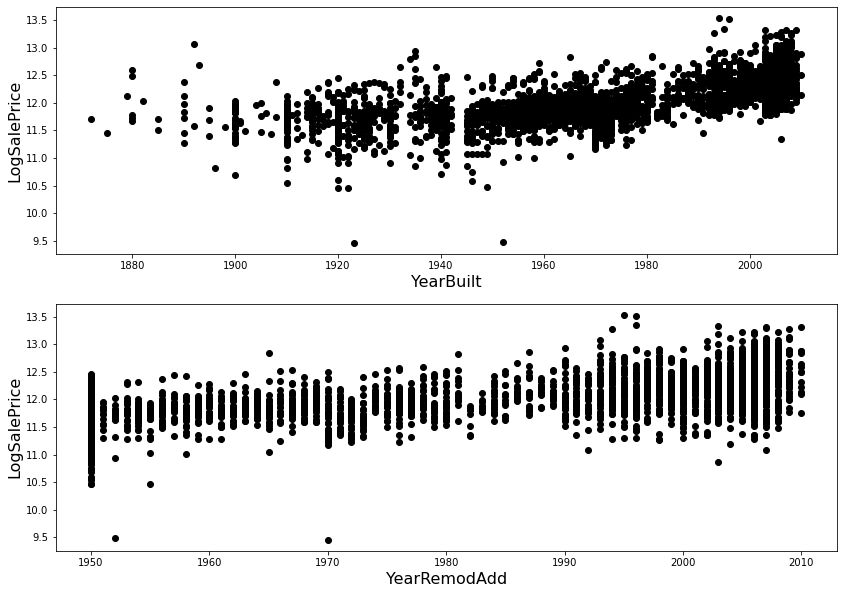

In [69]:
plt.figure(figsize=(14, 10))
plt.subplot(2,1,1)
plt.scatter(ames['YearBuilt'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('YearBuilt', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)

plt.subplot(2,1,2)
plt.scatter(ames['YearRemodAdd'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('YearRemodAdd', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)
plt.show()

#### Let's add features:
* `YearsSince1950Built` -- number of years after 1950 that the home was built (if before 1950, set to 0)
* `YearsSince1950Remod` -- number of years after 1950 that the home was remodeled

In [70]:
ames['YearsSince1950Built'] = (np.clip(ames['YearBuilt']-1950,0,np.nan)).astype('int')
ames['YearsSince1950Remod'] = (np.clip(ames['YearRemodAdd']-1950,0,np.nan)).astype('int')

ames.drop(columns=['YearBuilt', 'YearRemodAdd'], inplace=True)

### 1.4 Remove Outliers and Mistakes

Text(0, 0.5, 'LogSalePrice')

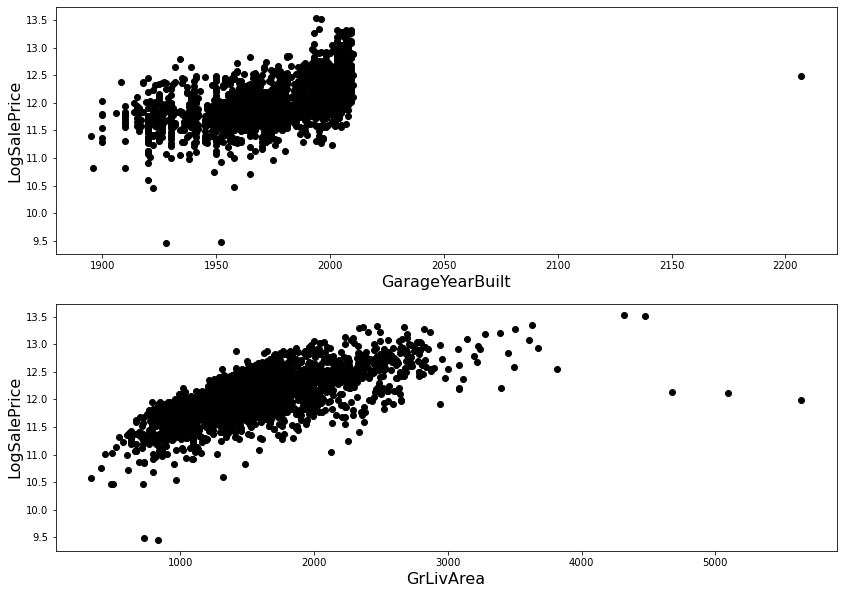

In [71]:
plt.figure(figsize=(14, 10))
plt.subplot(2,1,1)
plt.scatter(ames['GarageYrBlt'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('GarageYearBuilt', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)

plt.subplot(2,1,2)
plt.scatter(ames['GrLivArea'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('GrLivArea', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)

a) Throw away outliers and mistakes:

In [72]:
ames

,LogSalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,AsbShng,AsphShn,BrkCmn,BrkComm,BrkFace,CBlock,CemntBd,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,PreCast,Stone,Stucco,VinylSd,WdSdng,WdShing,WdShng,YearsSince1950Built,YearsSince1950Remod
0,12.278393,20,RL,141.0,31770.0,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,1Story,6,5,Hip,CompShg,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656.0,0.0,0.0,1656.0,1.0,0.0,1.0,0.0,3.0,1.0,TA,7.0,Typ,2.0,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210.0,62.0,0.0,0.0,0.0,0.0,NoPool,NoFence,None,0.0,5.0,2010.0,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10,10
1,11.561716,20,RH,80.0,11622.0,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,NAmes,1Fam,1Story,5,6,Gable,CompShg,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,TA,5.0,Typ,0.0,NoFirePlace,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140.0,0.0,0.0,0.0,120.0,0.0,NoPool,MnPrv,None,0.0,6.0,2010.0,WD,Normal,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11,11
2,12.055250,20,RL,81.0,14267.0,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,1Story,6,6,Hip,CompShg,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,Gd,6.0,Typ,0.0,NoFirePlace,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393.0,36.0,0.0,0.0,0.0,0.0,NoPool,NoFence,Gar2,12500.0,6.0,2010.0,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,8
3,12.404924,20,RL,93.0,11160.0,Pave,NoAccess,Reg,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,1Story,7,5,Hip,CompShg,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110.0,0.0,0.0,2110.0,1.0,0.0,2.0,1.0,3.0,1.0,Ex,8.0,Typ,2.0,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NoPool,NoFence,None,0.0,4.0,2010.0,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18
4,12.154253,60,RL,74.0,13830.0,Pave,NoAccess,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,1Fam,2Story,5,5,Gable,CompShg,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212.0,34.0,0.0,0.0,0.0,0.0,NoPool,MnPrv,None,0.0,3.0,2010.0,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,47,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,11.867097,80,RL,37.0,7937.0,Pave,NoAccess,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,1Fam,SLvl,6,6,Gable,CompShg,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003.0,0.0,0.0,1003.0,1.0,0.0,1.0,0.0,3.0,1.0,TA,6.0,Typ,0.0,NoFirePlace,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120.0,0.0,0.0,0.0,0.0,0.0,NoPool,GdPrv,None,0.0,3.0,2006.0,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [73]:
ames.loc[~(ames['GrLivArea']>4000)] # drop 1 obs

,LogSalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,AsbShng,AsphShn,BrkCmn,BrkComm,BrkFace,CBlock,CemntBd,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,PreCast,Stone,Stucco,VinylSd,WdSdng,WdShing,WdShng,YearsSince1950Built,YearsSince1950Remod
0,12.278393,20,RL,141.0,31770.0,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,1Story,6,5,Hip,CompShg,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656.0,0.0,0.0,1656.0,1.0,0.0,1.0,0.0,3.0,1.0,TA,7.0,Typ,2.0,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210.0,62.0,0.0,0.0,0.0,0.0,NoPool,NoFence,None,0.0,5.0,2010.0,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10,10
1,11.561716,20,RH,80.0,11622.0,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,NAmes,1Fam,1Story,5,6,Gable,CompShg,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,TA,5.0,Typ,0.0,NoFirePlace,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140.0,0.0,0.0,0.0,120.0,0.0,NoPool,MnPrv,None,0.0,6.0,2010.0,WD,Normal,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11,11
2,12.055250,20,RL,81.0,14267.0,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,1Story,6,6,Hip,CompShg,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,Gd,6.0,Typ,0.0,NoFirePlace,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393.0,36.0,0.0,0.0,0.0,0.0,NoPool,NoFence,Gar2,12500.0,6.0,2010.0,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,8
3,12.404924,20,RL,93.0,11160.0,Pave,NoAccess,Reg,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,1Story,7,5,Hip,CompShg,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110.0,0.0,0.0,2110.0,1.0,0.0,2.0,1.0,3.0,1.0,Ex,8.0,Typ,2.0,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NoPool,NoFence,None,0.0,4.0,2010.0,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18
4,12.154253,60,RL,74.0,13830.0,Pave,NoAccess,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,1Fam,2Story,5,5,Gable,CompShg,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212.0,34.0,0.0,0.0,0.0,0.0,NoPool,MnPrv,None,0.0,3.0,2010.0,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,47,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,11.867097,80,RL,37.0,7937.0,Pave,NoAccess,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,1Fam,SLvl,6,6,Gable,CompShg,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003.0,0.0,0.0,1003.0,1.0,0.0,1.0,0.0,3.0,1.0,TA,6.0,Typ,0.0,NoFirePlace,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120.0,0.0,0.0,0.0,0.0,0.0,NoPool,GdPrv,None,0.0,3.0,2006.0,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [74]:
ames = ames.loc[~(ames['GarageYrBlt']>2015)] # drop 1 obs
ames = ames.loc[~(ames['GrLivArea']>4000)] # drop 4 additional obs

Text(0, 0.5, 'LogSalePrice')

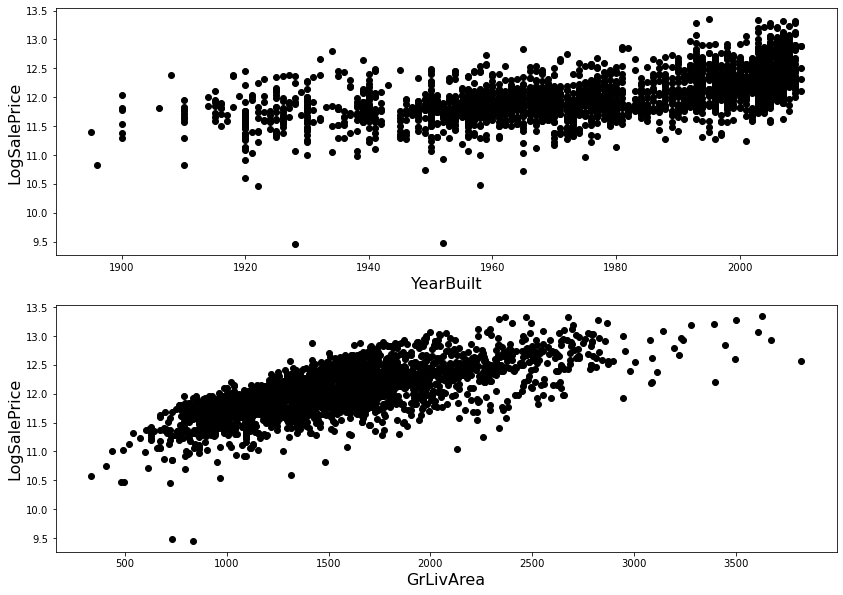

In [75]:
plt.figure(figsize=(14, 10))
plt.subplot(2,1,1)
plt.scatter(ames['GarageYrBlt'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('YearBuilt', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)

plt.subplot(2,1,2)
plt.scatter(ames['GrLivArea'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('GrLivArea', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)

b) Let's apply the same 1950 transformation to `GarageYrBlt`.

In [76]:
ames['YearsSince1950GarageBuilt'] = (np.clip(ames['GarageYrBlt']-1950,0,np.nan))
ames.drop(columns=['GarageYrBlt'], inplace=True)

### 1.5 Numerical variables to categorical variables (Time Sold and Quality Score)

#### 1.5.1 Time Sold:
    
Investigate further the time when the house was sold:

In [77]:
ames[['YrSold','MoSold']]=ames[['YrSold','MoSold']].astype('int')

<Figure size 432x288 with 0 Axes>

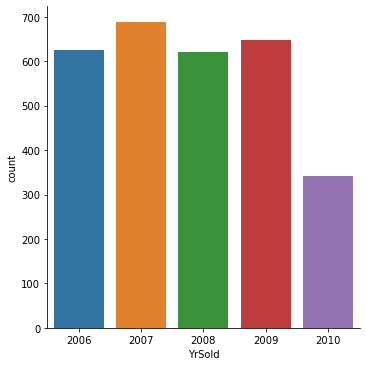

In [78]:
plt.figure(figsize=(6,4))
sns.catplot(x="YrSold", kind="count",data=ames)
plt.show()

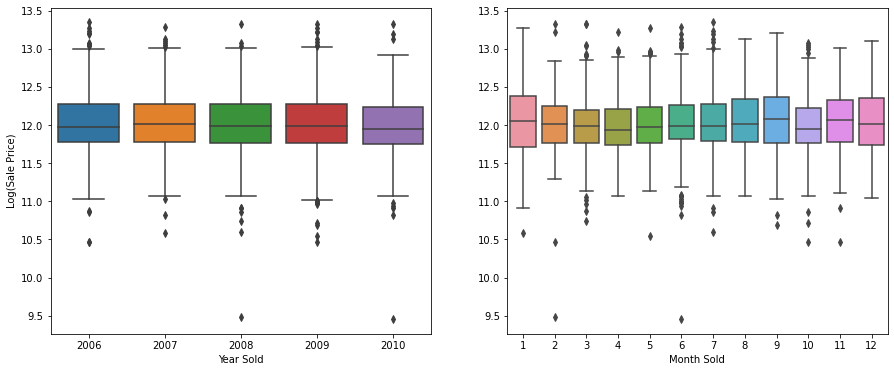

In [79]:
fig, axs=plt.subplots(1,2, figsize=(15,6))
sns.boxplot(x="YrSold", y="LogSalePrice", data=ames, ax= axs[0])
sns.boxplot(x="MoSold", y="LogSalePrice", data=ames, ax= axs[1])
axs[0].set_xlabel('Year Sold')
axs[1].set_xlabel('Month Sold')
axs[0].set_ylabel('Log(Sale Price)')
axs[1].set_ylabel('')
plt.show()

Convert `YrSold` and `MoSold` to categorical variables:

In [80]:
ames[['YrSold','MoSold']]=ames[['YrSold','MoSold']].astype('category')

#### 1.5.2 Quality Variables

Let's look at the overall quality/condition variables.

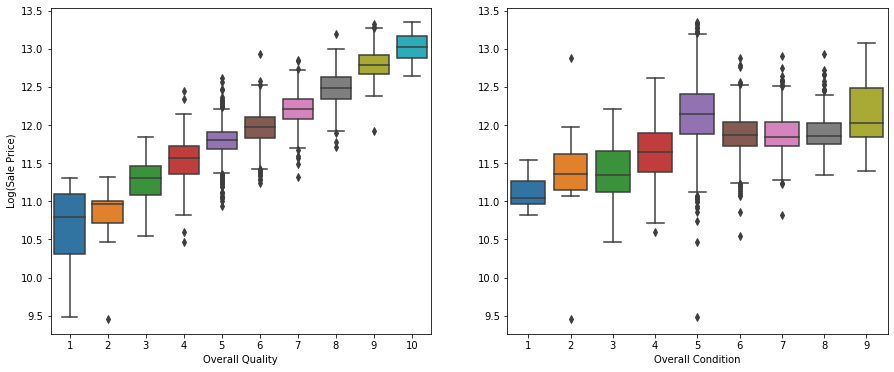

In [81]:
fig, axs=plt.subplots(1,2, figsize=(15,6))
sns.boxplot(x="OverallQual", y="LogSalePrice", data=ames, ax= axs[0])
sns.boxplot(x="OverallCond", y="LogSalePrice", data=ames, ax= axs[1])
axs[0].set_xlabel('Overall Quality')
axs[1].set_xlabel('Overall Condition')
axs[0].set_ylabel('Log(Sale Price)')
axs[1].set_ylabel('')
plt.show()

Let's encode them to categorical:

In [82]:
ames[['OverallQual','OverallCond']]=ames[['OverallQual','OverallCond']].astype('category')

### 1.6 Handling NaN Values

In [83]:
np.sum(ames.isnull())

LogSalePrice                   0
MSSubClass                     0
MSZoning                       0
LotFrontage                  490
LotArea                        0
Street                         0
Alley                          0
LotShape                       0
LandContour                    0
Utilities                      0
LotConfig                      0
LandSlope                      0
Neighborhood                   0
BldgType                       0
HouseStyle                     0
OverallQual                    0
OverallCond                    0
RoofStyle                      0
RoofMatl                       0
MasVnrType                    22
MasVnrArea                    22
ExterQual                      0
ExterCond                      0
Foundation                     0
BsmtQual                       1
BsmtCond                       1
BsmtExposure                   4
BsmtFinType1                   1
BsmtFinSF1                     1
BsmtFinType2                   2
BsmtFinSF2

In [84]:
amesCols = np.sum(ames.isnull())
amesNACols = amesCols[amesCols>0]
print(amesNACols)

LotFrontage                  490
MasVnrType                    22
MasVnrArea                    22
BsmtQual                       1
BsmtCond                       1
BsmtExposure                   4
BsmtFinType1                   1
BsmtFinSF1                     1
BsmtFinType2                   2
BsmtFinSF2                     1
BsmtUnfSF                      1
TotalBsmtSF                    1
Electrical                     1
BsmtFullBath                   2
BsmtHalfBath                   2
GarageFinish                   2
GarageCars                     1
GarageArea                     1
GarageQual                     1
GarageCond                     1
YearsSince1950GarageBuilt    159
dtype: int64


In [85]:
print(amesNACols.index.to_numpy())

['LotFrontage' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' 'Electrical' 'BsmtFullBath' 'BsmtHalfBath'
 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond'
 'YearsSince1950GarageBuilt']


Dealing with NA columns:

* For numerical variables, NAs arise because some factor has already been set to 0 (e.g., there is no basement), so we convert NAs to 0.

* For categorical variables, we add a new level corresponding to whether the variable is missing from that observation. We'll do this via dummy encoding as usual.


In [86]:
# numerical ones:
numerical_cols = ['LotFrontage', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath', 
                  'BsmtHalfBath', 'GarageCars', 'GarageArea', 'GrLivArea','YearsSince1950GarageBuilt']
for var in numerical_cols:
    print(var, ames[var].dtype)
    ames.loc[np.isnan(ames[var]), [var]] = 0

LotFrontage float64
MasVnrArea float64
BsmtFinSF1 float64
BsmtFinSF2 float64
BsmtUnfSF float64
TotalBsmtSF float64
BsmtFullBath float64
BsmtHalfBath float64
GarageCars float64
GarageArea float64
GrLivArea float64
YearsSince1950GarageBuilt float64


In [87]:
ames['MasVnrType'].dtype

dtype('O')

In [88]:
# categorical ones:
categorical_cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinType2', 'Electrical', 'GarageFinish', 'GarageQual', 'GarageCond']

for var in categorical_cols:
    print(var, ames[var].dtype)
    ames.loc[(ames[var]).isna(), [var]] = 'NaN'

ames[categorical_cols]=ames[categorical_cols].astype('category')

MasVnrType object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinType2 object
Electrical object
GarageFinish object
GarageQual object
GarageCond object


In [89]:
# check again:
print(np.sum(ames.isnull().any()))

0


### 1.7 Some More EDA

### 1.7.1 Continuous variables

<AxesSubplot:xlabel='GarageArea', ylabel='LogSalePrice'>

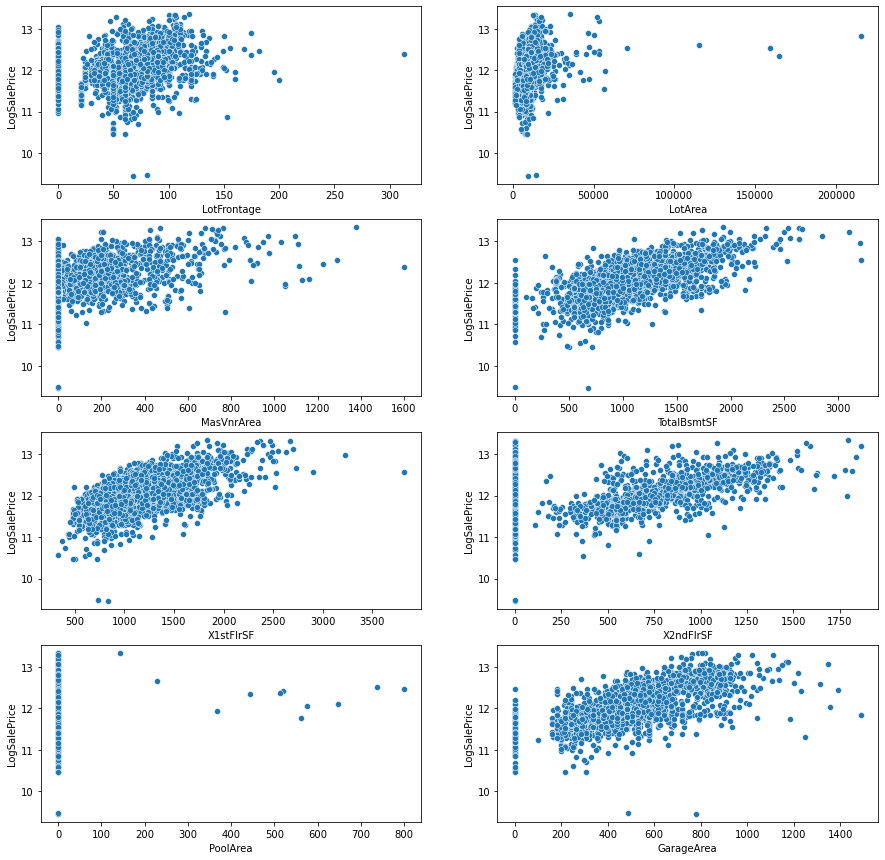

In [90]:
# a) Scattered plots
fig, axs=plt.subplots(4,2, figsize=(15,15))
sns.scatterplot(data=ames, x="LotFrontage", y="LogSalePrice", ax= axs[0,0])
sns.scatterplot(data=ames, x="LotArea", y="LogSalePrice", ax= axs[0,1])
sns.scatterplot(data=ames, x="MasVnrArea", y="LogSalePrice", ax= axs[1,0])
sns.scatterplot(data=ames, x="TotalBsmtSF", y="LogSalePrice", ax= axs[1,1])
sns.scatterplot(data=ames, x="X1stFlrSF", y="LogSalePrice", ax= axs[2,0])
sns.scatterplot(data=ames, x="X2ndFlrSF", y="LogSalePrice", ax= axs[2,1])
sns.scatterplot(data=ames, x="PoolArea", y="LogSalePrice", ax= axs[3,0])
sns.scatterplot(data=ames, x="GarageArea", y="LogSalePrice", ax= axs[3,1])

<AxesSubplot:xlabel='GarageArea', ylabel='LogSalePrice'>

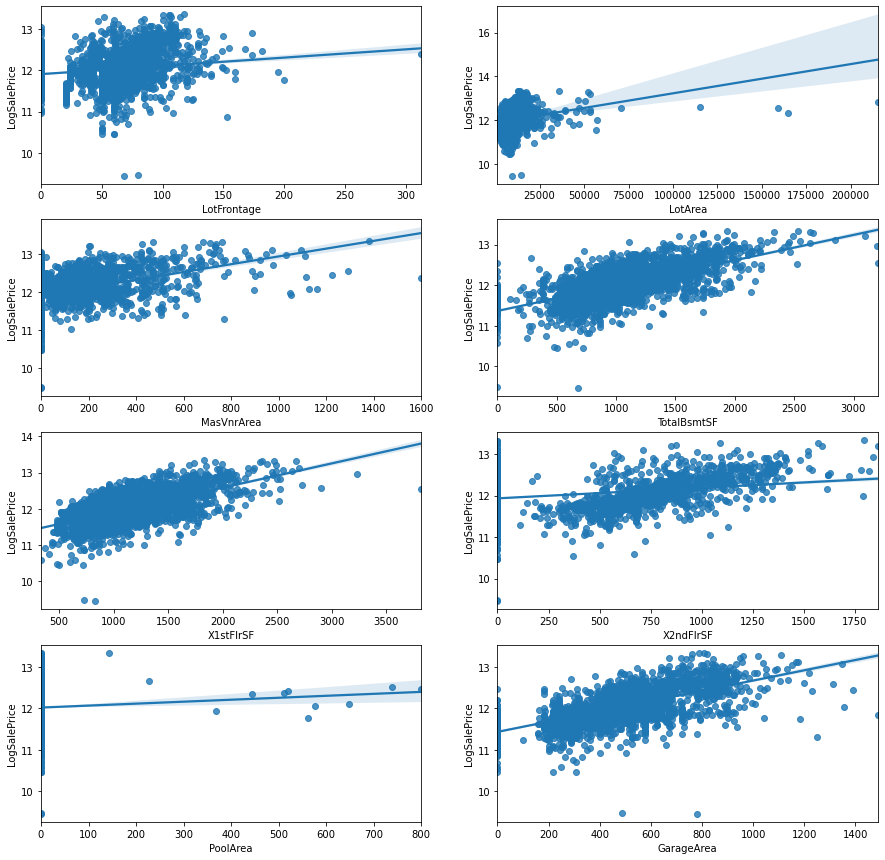

In [91]:
# b) Smoothed versions of those plots (with a trend line).
fig, axs=plt.subplots(4,2, figsize=(15,15))
sns.regplot(data=ames, x="LotFrontage", y="LogSalePrice", ax= axs[0,0])
sns.regplot(data=ames, x="LotArea", y="LogSalePrice", ax= axs[0,1])
sns.regplot(data=ames, x="MasVnrArea", y="LogSalePrice", ax= axs[1,0])
sns.regplot(data=ames, x="TotalBsmtSF", y="LogSalePrice", ax= axs[1,1])
sns.regplot(data=ames, x="X1stFlrSF", y="LogSalePrice", ax= axs[2,0])
sns.regplot(data=ames, x="X2ndFlrSF", y="LogSalePrice", ax= axs[2,1])
sns.regplot(data=ames, x="PoolArea", y="LogSalePrice", ax= axs[3,0])
sns.regplot(data=ames, x="GarageArea", y="LogSalePrice", ax= axs[3,1])


Note: It appears that there are nonlinear relationships. Later, we will use polynomials to enhance our models. 

### 1.7.2 Discrete Variables

Let's look at discrete variables now.

<AxesSubplot:xlabel='GarageCars', ylabel='LogSalePrice'>

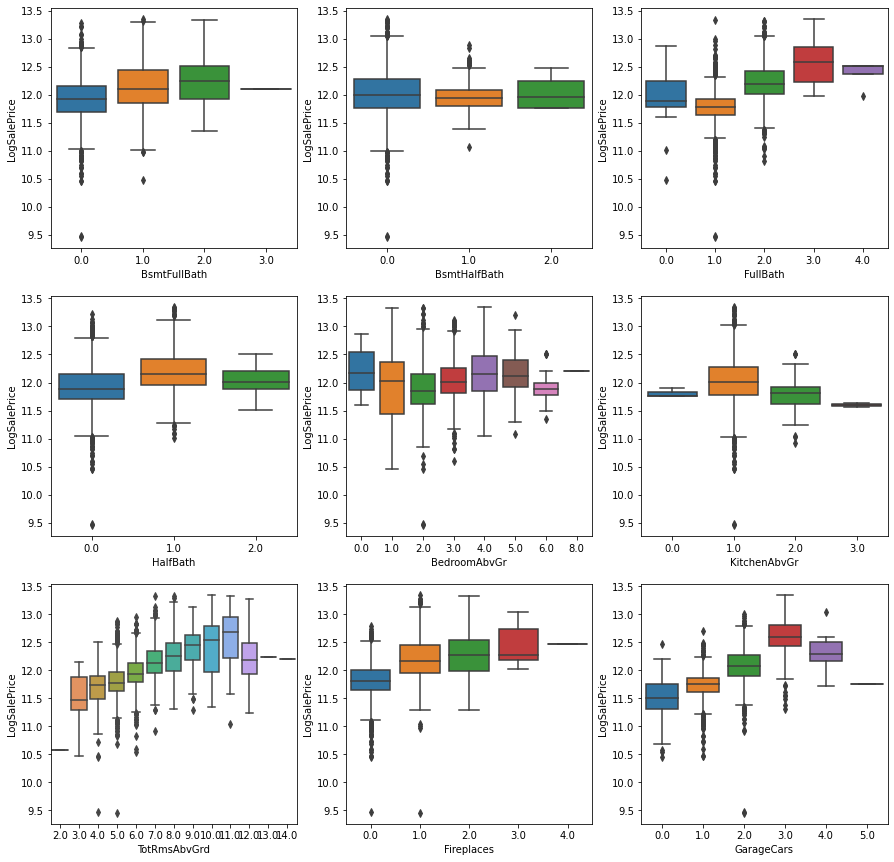

In [92]:
fig, axs=plt.subplots(3,3, figsize=(15,15))
sns.boxplot(data=ames, x="BsmtFullBath", y="LogSalePrice", ax= axs[0,0])
sns.boxplot(data=ames, x="BsmtHalfBath", y="LogSalePrice", ax= axs[0,1])
sns.boxplot(data=ames, x="FullBath", y="LogSalePrice", ax= axs[0,2])
sns.boxplot(data=ames, x="HalfBath", y="LogSalePrice", ax= axs[1,0])
sns.boxplot(data=ames, x="BedroomAbvGr", y="LogSalePrice", ax= axs[1,1])
sns.boxplot(data=ames, x="KitchenAbvGr", y="LogSalePrice", ax= axs[1,2])
sns.boxplot(data=ames, x="TotRmsAbvGrd", y="LogSalePrice", ax= axs[2,0])
sns.boxplot(data=ames, x="Fireplaces", y="LogSalePrice", ax= axs[2,1])
sns.boxplot(data=ames, x="GarageCars", y="LogSalePrice", ax= axs[2,2])


Let's convert those all to factors.

In [93]:
discrete_cols = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MSSubClass']
ames[discrete_cols] = ames[discrete_cols].astype('int').astype('category')

### 1.7.3 Other Categorical Variables

We still have many columns that are categorical. We must encode them before passing them to our models

In [94]:
still_categorical = ames.columns[ames.dtypes == 'object']
for col in still_categorical:
    print(col, ':\n', ames[col].unique())

MSZoning :
 ['RL' 'RH' 'FV' 'RM' 'C' 'I' 'A']
Street :
 ['Pave' 'Grvl']
Alley :
 ['NoAccess' 'Pave' 'Grvl']
LotShape :
 ['IR1' 'Reg' 'IR2' 'IR3']
LandContour :
 ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities :
 ['AllPub' 'NoSewr' 'NoSeWa']
LotConfig :
 ['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']
LandSlope :
 ['Gtl' 'Mod' 'Sev']
Neighborhood :
 ['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
BldgType :
 ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
HouseStyle :
 ['1Story' '2Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '1.5Unf' '2.5Fin']
RoofStyle :
 ['Hip' 'Gable' 'Mansard' 'Gambrel' 'Shed' 'Flat']
RoofMatl :
 ['CompShg' 'WdShake' 'Tar&Grv' 'WdShngl' 'Membran' 'Roll' 'Metal']
ExterQual :
 ['TA' 'Gd' 'Ex' 'Fa']
ExterCond :
 ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Foundation :
 ['CBlock' 'PConc' '

In [95]:
ames[still_categorical] = ames[still_categorical].astype('category')

In [96]:
ames.head()

,LogSalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,AsbShng,AsphShn,BrkCmn,BrkComm,BrkFace,CBlock,CemntBd,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,PreCast,Stone,Stucco,VinylSd,WdSdng,WdShing,WdShng,YearsSince1950Built,YearsSince1950Remod,YearsSince1950GarageBuilt
0,12.278393,20,RL,141.0,31770.0,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,1Story,6,5,Hip,CompShg,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656.0,0.0,0.0,1656.0,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,Fin,2,528.0,TA,TA,P,210.0,62.0,0.0,0.0,0.0,0.0,NoPool,NoFence,None,0.0,5,2010,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10,10,10.0
1,11.561716,20,RH,80.0,11622.0,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,NAmes,1Fam,1Story,5,6,Gable,CompShg,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896.0,0.0,0.0,896.0,0,0,1,0,2,1,TA,5,Typ,0,NoFirePlace,Attchd,Unf,1,730.0,TA,TA,Y,140.0,0.0,0.0,0.0,120.0,0.0,NoPool,MnPrv,None,0.0,6,2010,WD,Normal,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11,11,11.0
2,12.055250,20,RL,81.0,14267.0,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,1Story,6,6,Hip,CompShg,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329.0,0.0,0.0,1329.0,0,0,1,1,3,1,Gd,6,Typ,0,NoFirePlace,Attchd,Unf,1,312.0,TA,TA,Y,393.0,36.0,0.0,0.0,0.0,0.0,NoPool,NoFence,Gar2,12500.0,6,2010,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,8,8.0
3,12.404924,20,RL,93.0,11160.0,Pave,NoAccess,Reg,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,1Story,7,5,Hip,CompShg,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110.0,0.0,0.0,2110.0,1,0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,Fin,2,522.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NoPool,NoFence,None,0.0,4,2010,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,18.0
4,12.154253,60,RL,74.0,13830.0,Pave,NoAccess,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,1Fam,2Story,5,5,Gable,CompShg,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928.0,701.0,0.0,1629.0,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,Fin,2,482.0,TA,TA,Y,212.0,34.0,0.0,0.0,0.0,0.0,NoPool,MnPrv,None,0.0,3,2010,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,47,48,47.0


## 2. Regression Analysis and Regularization Methods

### Helper Functions

In [97]:
def OSR2(y_train, y_test, y_pred):
    
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [98]:
def MAE(y_test, y_pred):
    
    return (np.mean(abs(y_test - y_pred)))

In [99]:
def RMSE(y_test, y_pred):
    
    return np.sqrt(np.mean((y_test - y_pred)**2))

In [100]:
def print_metrics(model, X_train, y_train, X_test, y_test, flag_log_sale_price=False):

    if (flag_log_sale_price == True):
        
        y_pred_train = pd.Series(model.predict(X_train)).reset_index(drop=True)
        y_pred_test = pd.Series(model.predict(X_test)).reset_index(drop=True)
        y_train = y_train.copy().reset_index(drop=True)
        y_test = y_test.copy().reset_index(drop=True)
        
        print("\nMetrics for Log(Sale Price):\n")
        
    elif (flag_log_sale_price == False):
        
        y_pred_train = pd.Series(model.predict(X_train)).apply(np.exp).reset_index(drop=True)
        y_pred_test = pd.Series(model.predict(X_test)).apply(np.exp).reset_index(drop=True)
        y_train = y_train.copy().apply(np.exp).reset_index(drop=True)
        y_test = y_test.copy().apply(np.exp).reset_index(drop=True)
        
        print("\nMetrics for Sale Price:\n")

    print('Training R2', OSR2(y_train, y_train, y_pred_train))
    print('Training MAE', MAE(y_train, y_pred_train))
    print('Training RMSE', RMSE(y_train, y_pred_train))

    print('Out-of-sample R2', OSR2(y_train, y_test, y_pred_test))
    print('Out-of-sample MAE', MAE(y_test, y_pred_test))
    print('Out-of-sample RMSE', RMSE(y_test, y_pred_test))
    
    return None

### Sequential Split

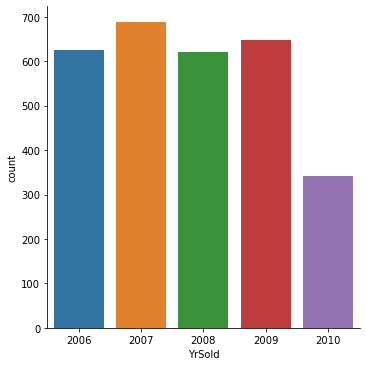

In [101]:
sns.catplot(x="YrSold", kind="count",data=ames)

In [102]:
ames.loc[ames['YrSold'].isin([2006, 2007, 2008])]

,LogSalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,AsbShng,AsphShn,BrkCmn,BrkComm,BrkFace,CBlock,CemntBd,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,PreCast,Stone,Stucco,VinylSd,WdSdng,WdShing,WdShng,YearsSince1950Built,YearsSince1950Remod,YearsSince1950GarageBuilt
989,12.081076,20,RL,87.0,11029.0,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,1Story,6,8,Hip,CompShg,None,0.0,Ex,TA,CBlock,Gd,TA,No,ALQ,528.0,BLQ,411.0,245.0,1184.0,GasA,Ex,Y,SBrkr,1414.0,0.0,0.0,1414.0,1,0,1,0,3,1,TA,6,Min1,1,TA,Attchd,Unf,2,601.0,TA,TA,Y,0.0,51.0,0.0,0.0,190.0,0.0,NoPool,NoFence,None,0.0,5,2008,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,52,40.0
990,12.377923,20,RL,0.0,12925.0,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,1Story,6,7,Gable,CompShg,None,0.0,TA,TA,CBlock,TA,TA,Mn,BLQ,865.0,Unf,0.0,340.0,1205.0,GasA,Ex,Y,SBrkr,2117.0,0.0,0.0,2117.0,0,0,2,1,4,1,TA,7,Typ,2,Gd,Attchd,Fin,2,550.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,NoPool,NoFence,None,0.0,5,2008,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,20,20,20.0
991,12.239991,60,RL,85.0,11075.0,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,NAmes,1Fam,2Story,6,5,Gable,CompShg,None,0.0,TA,TA,CBlock,Fa,TA,Mn,ALQ,500.0,LwQ,276.0,176.0,952.0,GasA,TA,Y,SBrkr,1092.0,1020.0,0.0,2112.0,0,0,2,1,4,1,TA,9,Typ,2,Gd,Attchd,Unf,2,576.0,TA,TA,Y,280.0,0.0,0.0,0.0,0.0,0.0,NoPool,NoFence,None,0.0,6,2008,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,19,19,19.0
992,12.141534,60,RL,72.0,8702.0,Pave,NoAccess,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,1Fam,2Story,6,5,Gable,CompShg,None,0.0,TA,TA,PConc,TA,TA,No,BLQ,706.0,Unf,0.0,220.0,926.0,GasA,Ex,Y,SBrkr,926.0,678.0,0.0,1604.0,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,Fin,2,470.0,TA,TA,Y,0.0,36.0,0.0,0.0,0.0,0.0,NoPool,NoFence,None,0.0,4,2008,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,47,48,47.0
993,12.013701,60,RL,65.0,8139.0,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,1Fam,2Story,6,5,Gable,CompShg,BrkFace,119.0,TA,TA,PConc,Gd,TA,No,ALQ,476.0,Unf,0.0,204.0,680.0,GasA,Gd,Y,SBrkr,680.0,790.0,0.0,1470.0,0,0,2,1,3,1,TA,7,Typ,1,TA,BuiltIn,Fin,2,420.0,TA,TA,Y,192.0,49.0,0.0,0.0,0.0,0.0,NoPool,NoFence,None,0.0,10,2008,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,45,46,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,11.867097,80,RL,37.0,7937.0,Pave,NoAccess,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,1Fam,SLvl,6,6,Gable,CompShg,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003.0,0.0,0.0,1003.0,1,0,1,0,3,1,TA,6,Typ,0,NoFirePlace,Detchd,Unf,2,588.0,TA,TA,Y,120.0,0.0,0.0,0.0,0.0,0.0,NoPool,GdPrv,None,0.0,3,2006,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34,34,34.0
2926,11.782953,20,RL,0.0,8885.0,Pave,NoAccess,IR1,Low,AllPub,Inside,Mod,Mitchel,1Fam,1Story,5,5,Gable,CompShg,None,0.0,TA,TA,CB

In [103]:
ames_train = ames.loc[ames['YrSold'].isin([2006, 2007, 2008])]
ames_test = ames.loc[ames['YrSold'].isin([2009, 2010])]

ames.drop(columns = ['YrSold'], inplace=True)
ames_train.drop(columns = ['YrSold'], inplace=True)
ames_test.drop(columns = ['YrSold'], inplace=True)

print(ames.shape, ames_train.shape, ames_test.shape)

(2924, 104) (1935, 104) (989, 104)


/Users/jwang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Higher-order Variables

We can construct new features using a polynomial transformation. This is necessary because the regression plots we generated with 'LogSalePrice ~ [single independent variable]' exhibits some non-linear relationship. In the function below, you can choose the highest degree of the polynomial features. A higher degree polynomial might cause overfitting concern, but we will later use 'regularization' to mitigate this issue. 


In [104]:
def create_polynomial_features(df, n_degree):

    new_df = None
    
    for i in range(2, n_degree+1):
        
        tmp = df.pow(i)
        
        affix = '_p'+str(i)
        tmp.columns = list(map(lambda x: x + affix, df.columns))
        
        if new_df is not None:
            new_df = pd.concat([new_df, tmp], axis=1)
        else:
            new_df = tmp
    
    return new_df

<span style='color:blue'>
    
NOTE: An important consideration when creating higher-order variables is that the resulting features will tend to have some degree of linear dependence amongst themselves. This is normal as several new features are based on their zero-th power peer. Such correlation can also yield a high degree of multicollinearity in the regression models. The `sklearn` implementations that we will be using do not automatically account for this phenomenon, therefore we must be careful in selection the `n_degree`, and analyzing the model fit. 

</span>

In [105]:
# We only choose a select list of variables to do polynomial transformation.
poly_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
             'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
             'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'MiscVal', 'YearsSince1950Built',
             'YearsSince1950Remod', 'YearsSince1950GarageBuilt']

In [119]:
ames_train.LogSalePrice

989     12.081076
990     12.377923
991     12.239991
992     12.141534
993     12.013701
          ...    
2925    11.867097
2926    11.782953
2927    11.790557
2928    12.043554
2929    12.144197
Name: LogSalePrice, Length: 1935, dtype: float64

In [120]:
n_degree = 2

train_poly_temp = create_polynomial_features(ames_train[poly_cols], n_degree)
test_poly_temp = create_polynomial_features(ames_test[poly_cols], n_degree)

ames_train_poly = pd.concat([ames_train, train_poly_temp], axis=1)
ames_test_poly = pd.concat([ames_test, test_poly_temp], axis=1)
y_train = ames_train.LogSalePrice
y_test = ames_test.LogSalePrice

print(ames_train.shape, ames_test.shape)
print(train_poly_temp.shape, test_poly_temp.shape)
print(ames_train_poly.shape, ames_test_poly.shape)

(1935, 104) (989, 104)
(1935, 21) (989, 21)
(1935, 125) (989, 125)


## 2.1 Naive Linear Regression

a) with only original features (without polynomial features)

In [131]:
import statsmodels.formula.api as smf
print(ames_train.shape)
all_columns = "+".join(ames_train.columns.difference(["LogSalePrice"]))
my_formula = "LogSalePrice~" + all_columns +'-1'
print(my_formula)

mod_naive = smf.ols(my_formula, data=ames_train)
nlr = mod_naive.fit()

print(nlr.summary())

(1935, 104)
LogSalePrice~Alley+Artery+AsbShng+AsphShn+BedroomAbvGr+BldgType+BrkCmn+BrkComm+BrkFace+BsmtCond+BsmtExposure+BsmtFinSF1+BsmtFinSF2+BsmtFinType1+BsmtFinType2+BsmtFullBath+BsmtHalfBath+BsmtQual+BsmtUnfSF+CBlock+CemntBd+CentralAir+CmentBd+Electrical+EnclosedPorch+ExterCond+ExterQual+Feedr+Fence+FireplaceQu+Fireplaces+Foundation+FullBath+Functional+GarageArea+GarageCars+GarageCond+GarageFinish+GarageQual+GarageType+GrLivArea+HalfBath+HdBoard+Heating+HeatingQC+HouseStyle+ImStucc+KitchenAbvGr+KitchenQual+LandContour+LandSlope+LotArea+LotConfig+LotFrontage+LotShape+LowQualFinSF+MSSubClass+MSZoning+MasVnrArea+MasVnrType+MetalSd+MiscFeature+MiscVal+MoSold+Neighborhood+Norm+OpenPorchSF+Other+OverallCond+OverallQual+PavedDrive+Plywood+PoolArea+PoolQC+PosA+PosN+PreCast+RRAe+RRAn+RRNe+RRNn+RoofMatl+RoofStyle+SaleCondition+SaleType+ScreenPorch+Stone+Street+Stucco+TotRmsAbvGrd+TotalBsmtSF+Utilities+VinylSd+WdSdng+WdShing+WdShng+WoodDeckSF+X1stFlrSF+X2ndFlrSF+X3SsnPorch+YearsSince1950Built

In [122]:
print_metrics(nlr, ames_train, y_train, ames_test, y_test, flag_log_sale_price = True)
print_metrics(nlr, ames_train, y_train, ames_test, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.959443995300461
Training MAE 0.05796122911589418
Training RMSE 0.08074829014044851
Out-of-sample R2 0.8273412368996219
Out-of-sample MAE 0.0895802370142962
Out-of-sample RMSE 0.17270265726774886

Metrics for Sale Price:

Training R2 0.9620359019363873
Training MAE 10311.739938913093
Training RMSE 15272.768394310171
Out-of-sample R2 0.8340973157939828
Out-of-sample MAE 14863.775288657853
Out-of-sample RMSE 32119.84953187136


b) with polynomial features

In [123]:
print(ames_train_poly.shape)
all_columns = "+".join(ames_train_poly.columns.difference(["LogSalePrice"]))
my_formula = "LogSalePrice~" + all_columns +'-1'
print(my_formula)

mod_naive_poly = smf.ols(my_formula, data=ames_train_poly)
nlr_poly = mod_naive_poly.fit()

print(nlr_poly.summary())

(1935, 125)
LogSalePrice~Alley+Artery+AsbShng+AsphShn+BedroomAbvGr+BldgType+BrkCmn+BrkComm+BrkFace+BsmtCond+BsmtExposure+BsmtFinSF1+BsmtFinSF1_p2+BsmtFinSF2+BsmtFinSF2_p2+BsmtFinType1+BsmtFinType2+BsmtFullBath+BsmtHalfBath+BsmtQual+BsmtUnfSF+BsmtUnfSF_p2+CBlock+CemntBd+CentralAir+CmentBd+Electrical+EnclosedPorch+EnclosedPorch_p2+ExterCond+ExterQual+Feedr+Fence+FireplaceQu+Fireplaces+Foundation+FullBath+Functional+GarageArea+GarageArea_p2+GarageCars+GarageCond+GarageFinish+GarageQual+GarageType+GrLivArea+GrLivArea_p2+HalfBath+HdBoard+Heating+HeatingQC+HouseStyle+ImStucc+KitchenAbvGr+KitchenQual+LandContour+LandSlope+LotArea+LotArea_p2+LotConfig+LotFrontage+LotFrontage_p2+LotShape+LowQualFinSF+LowQualFinSF_p2+MSSubClass+MSZoning+MasVnrArea+MasVnrArea_p2+MasVnrType+MetalSd+MiscFeature+MiscVal+MiscVal_p2+MoSold+Neighborhood+Norm+OpenPorchSF+OpenPorchSF_p2+Other+OverallCond+OverallQual+PavedDrive+Plywood+PoolArea+PoolQC+PosA+PosN+PreCast+RRAe+RRAn+RRNe+RRNn+RoofMatl+RoofStyle+SaleCondition+

In [124]:
print_metrics(nlr_poly, ames_train_poly, y_train, ames_test_poly, y_test, flag_log_sale_price = True)
#print_metrics(nlr_poly, ames_train_poly, y_train, ames_test_poly, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.9612993723668551
Training MAE 0.05598790276051243
Training RMSE 0.07887961035555968
Out-of-sample R2 0.828527115310963
Out-of-sample MAE 0.089762165535706
Out-of-sample RMSE 0.17210854542447257


<span style='color:blue'>
    
^ Pay attention to the test set performance.

</span>

## 2.2 "Common Sense" Linear Regression

We want to perform linear regression with only some of the variables which could be chosen using common sense

In [125]:
ames_train[['MSSubClass', 'OverallQual','YearsSince1950Built','GrLivArea','TotRmsAbvGrd','FullBath','SaleCondition']]

,MSSubClass,OverallQual,YearsSince1950Built,GrLivArea,TotRmsAbvGrd,FullBath,SaleCondition
989,20,6,8,1414.0,6,1,Normal
990,20,6,20,2117.0,7,2,Normal
991,60,6,19,2112.0,9,2,Normal
992,60,6,47,1604.0,7,2,Normal
993,60,6,45,1470.0,7,2,Normal
...,...,...,...,...,...,...,...
2925,80,6,34,1003.0,6,1,Normal
2926,20,5,33,902.0,5,1,Normal
2927,85,5,42,970.0,6,1,Normal
2928,20,5,24,1389.0,6,1,Normal


In [126]:
ames_train_cs = ames_train[['LogSalePrice','MSSubClass', 'OverallQual','YearsSince1950Built','GrLivArea','TotRmsAbvGrd','FullBath','SaleCondition']]
ames_train_cs[['OverallQual']] = ames_train_cs[['OverallQual']].astype('int') 
ames_train_cs[['TotRmsAbvGrd']] = ames_train_cs[['TotRmsAbvGrd']].astype('int') 
ames_train_cs[['FullBath']] = ames_train_cs[['FullBath']].astype('int') 

print(ames_train_cs.shape)
all_columns = "+".join(ames_train_cs.columns.difference(["LogSalePrice"]))
my_formula = "LogSalePrice~" + all_columns +'-1'
print(my_formula)

mod_commonsense = smf.ols(my_formula, data=ames_train_cs)
lr_cs = mod_commonsense.fit()

print(lr_cs.summary())

(1935, 8)
LogSalePrice~FullBath+GrLivArea+MSSubClass+OverallQual+SaleCondition+TotRmsAbvGrd+YearsSince1950Built-1
                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     459.8
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:58:24   Log-Likelihood:                 908.40
No. Observations:                1935   AIC:                            -1765.
Df Residuals:                    1909   BIC:                            -1620.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---

/Users/jwang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [127]:
print_metrics(lr_cs, ames_train_cs, y_train, ames_test, y_test, flag_log_sale_price = True)
#print_metrics(lr_cs, ames_train_cs, y_train, ames_test, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.8575872255322424
Training MAE 0.11011044891107069
Training RMSE 0.15131438818185286
Out-of-sample R2 0.8324333920162762
Out-of-sample MAE 0.11903647017330195
Out-of-sample RMSE 0.17013687294276766


# --------------------Beginning of Part II------------------------------

## 1. Principal Components Regression

We first remove columns that are nearly constant, i.e., have small standard deviation. Then we use sklearn grid-search for cross validation and finally retrain the final model.  

In [165]:
X_train_poly = ames_train_poly.drop(columns='LogSalePrice')
X_test_poly = ames_test_poly.drop(columns='LogSalePrice')

X_train_poly_wide = pd.get_dummies(X_train_poly)
X_test_poly_wide = pd.get_dummies(X_test_poly)

In [166]:
y_train = ames_train['LogSalePrice']
y_test = ames_test['LogSalePrice']

X_train_pcr = X_train_poly_wide.loc[:, X_train_poly_wide.std() > 0.1]
X_test_pcr = X_test_poly_wide[X_train_pcr.columns]

print(X_train_poly_wide.shape, X_train_pcr.shape)
print(X_test_poly_wide.shape, X_test_pcr.shape)

(1935, 410) (1935, 284)
(989, 410) (989, 284)


We also standardize the data before feeding it to the PCA step, as recommended by good practice.

In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
pca = PCA(random_state=88)
lr = LinearRegression()
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('lr', lr)])

### PCR Hyper-parameter Tuning

In [168]:
param_grid = {'pca__n_components': np.linspace(1, 100, 100).astype('int')}

pcr_cv = GridSearchCV(pipe,
                      param_grid,
                      scoring='neg_mean_squared_error',
                      cv=10)
pcr_cv.fit(X_train_pcr, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(random_state=88)),
                                       ('lr', LinearRegression())]),
             param_grid={'pca__n_components': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
             scoring='neg_mean_squared_error')

In [169]:
def one_standard_error_rule(model, results, param_grid, n_splits, neg_mean_squared_error=True):
    
    assert neg_mean_squared_error == True # function is defined specifically for neg_mean_squared_error
    
    range_x = param_grid # results['param_'+list(param_grid.keys())[0]].data
    std_vs_x  = pd.Series(results['std_test_score'], index = range_x)
    sem_vs_x  = std_vs_x/np.sqrt(n_splits)
    
    mean_vs_x = pd.Series(results['mean_test_score'], index = range_x)        
    mean_vs_x = mean_vs_x*(-1)
    
    x_min = mean_vs_x.idxmin()
    sem = sem_vs_x[x_min]
    
    if (model=='pcr'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.min()
    elif (model=='ridge') | (model=='lasso'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.max()
        
    #x_1se_idx = int(np.argwhere(range_x == x_1se)[0])
    
    return x_min, x_1se

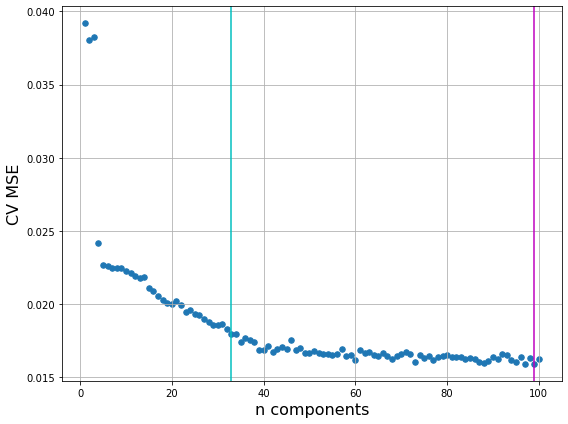

In [170]:
from scipy import stats

n_components = pcr_cv.cv_results_['param_pca__n_components'].data
MSE_scores = pcr_cv.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='pcr',
                                       results=pcr_cv.cv_results_,
                                       param_grid=n_components,
                                       n_splits=10,
                                       neg_mean_squared_error=True)

plt.figure(figsize=(8, 6))
plt.xlabel('n components', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(n_components, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

Magenta vertical line is the minimizer, the cyan vertical line is the "1 Standard Error" selection.

In [171]:
print('pca n_components', x_1se)
print('CV best MSE score:', MSE_scores[x_1se])

pca n_components 33
CV best MSE score: 0.017953722920604008


In [172]:
print_metrics(pcr_cv, X_train_pcr, y_train, X_test_pcr, y_test, flag_log_sale_price = True)
# print_metrics(pcr_cv, X_train_pcr, y_train, X_test_pcr, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.9180600940769285
Training MAE 0.07932953221410795
Training RMSE 0.11477663366470338
Out-of-sample R2 0.8894375243959642
Out-of-sample MAE 0.09305199181614861
Out-of-sample RMSE 0.1382001722592725


### PCR Refit with One Standard Error Rule

In [173]:
pcr_cv = GridSearchCV(pipe,
                      {'pca__n_components': [x_1se]},
                      scoring='neg_mean_squared_error',
                      cv=10)
pcr_cv.fit(X_train_pcr, y_train)

print_metrics(pcr_cv, X_train_pcr, y_train, X_test_pcr, y_test, flag_log_sale_price = True)
#print_metrics(pcr_cv, X_train_pcr, y_train, X_test_pcr, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.8982058766859876
Training MAE 0.08979601126260173
Training RMSE 0.1279284405017724
Out-of-sample R2 0.868957633506501
Out-of-sample MAE 0.10074432991195212
Out-of-sample RMSE 0.15045636698375328


## 2. Ridge Regression

We can choose `alpha_max` so as the value that makes all coefficientes zero, and then construct a log sequence of `alpha` values trending smaller, decreasing the degree of regularization. 

For the case of `Ridge` Regression, alpha value that would make all coefficients zero would be `Inf`, however we can be satisfied with sufficiently small numbers, and work from there.

In [174]:
X_train_rr = X_train_poly_wide
X_test_rr = X_test_poly_wide

print(X_train_rr.shape, X_test_rr.shape)

(1935, 410) (989, 410)


### Determine 'alpha_max'

In [175]:
from sklearn.linear_model import Ridge

alpha_max = 10**5
rr = Ridge(alpha=alpha_max, random_state=88)
rr.fit(X_train_rr, y_train)

/Users/jwang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.85625e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=100000, random_state=88)

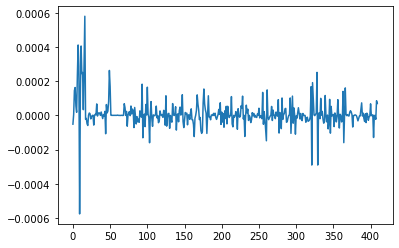

0.000580019882616395


In [176]:
plt.plot(rr.coef_)
plt.show()
print(max(abs(rr.coef_)))

### Ridge Coefficients vs. Degree of Regularization

In [177]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Glmnet Rule (alpha = 2N*lambda)
# https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html
    
# alpha_max = 10**5
# n_alpha = 50
# n_obs, n_vars = X_train.shape
# alpha_min_ratio = 0.0001 if n_obs > n_vars else 0.01
# alpha_min_ratio = 10**(-8) # overwrite rule
# alpha_min = alpha_max/alpha_min_ratio
# alpha_grid = np.logspace(np.log10(alpha_min_ratio*alpha_max), np.log10(alpha_max), num=n_alpha, base=10)

In [178]:
alpha_grid = np.logspace(-1, 5, num=50, base=10)
coefs = []

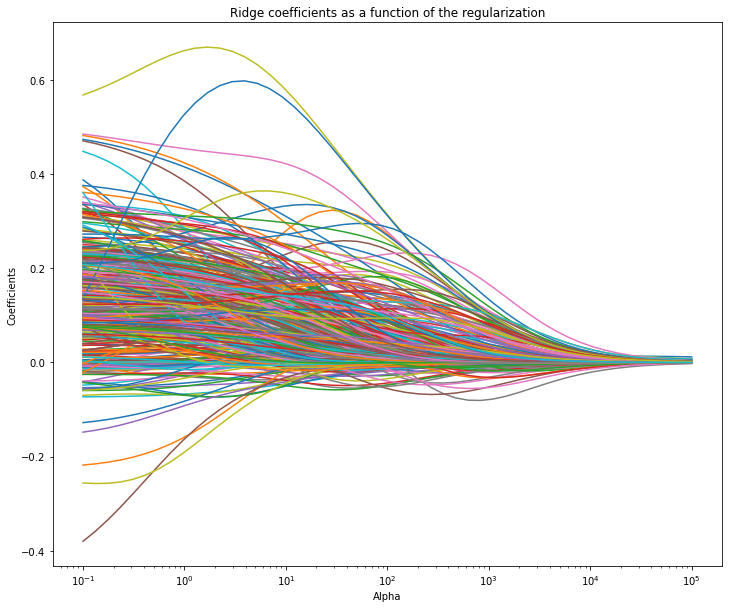

In [179]:
for a in alpha_grid:
    rr = Ridge(alpha=a, fit_intercept=False, random_state=88)
    rr.fit(X_train_rr, y_train)
    coefs.append(rr.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alpha_grid, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

### Ridge Hyper-parameter Tuning

In [180]:
alpha_grid = {'alpha': np.logspace(-1, 5, num=50, base=10)}

rr = Ridge(random_state=88)
rr_cv = GridSearchCV(rr, alpha_grid, scoring='neg_mean_squared_error', cv=10)
rr_cv.fit(X_train_rr, y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=88),
             param_grid={'alpha': array([1.00000000e-01, 1.32571137e-01, 1.75751062e-01, 2.32995181e-01,
       3.08884360e-01, 4.09491506e-01, 5.42867544e-01, 7.19685673e-01,
       9.54095476e-01, 1.26485522e+00, 1.67683294e+00, 2.22299648e+00,
       2.94705170e+00, 3.90693994e+00, 5.17947468e+00, 6.86648845e+00,
       9.10298178e+00, 1.20679264e+01, 1...
       2.68269580e+02, 3.55648031e+02, 4.71486636e+02, 6.25055193e+02,
       8.28642773e+02, 1.09854114e+03, 1.45634848e+03, 1.93069773e+03,
       2.55954792e+03, 3.39322177e+03, 4.49843267e+03, 5.96362332e+03,
       7.90604321e+03, 1.04811313e+04, 1.38949549e+04, 1.84206997e+04,
       2.44205309e+04, 3.23745754e+04, 4.29193426e+04, 5.68986603e+04,
       7.54312006e+04, 1.00000000e+05])},
             scoring='neg_mean_squared_error')

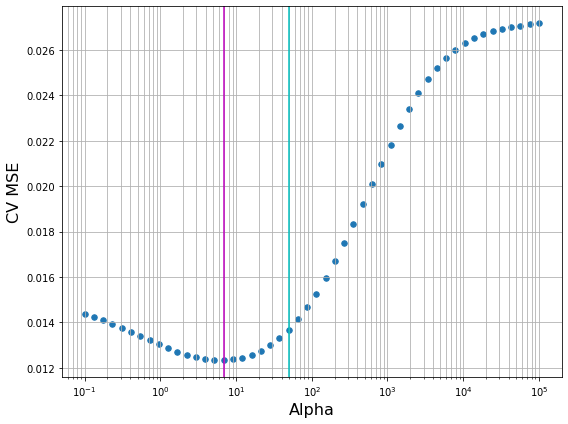

In [181]:
range_alpha = rr_cv.cv_results_['param_alpha'].data
MSE_scores = rr_cv.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='ridge',
                                       results=rr_cv.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [182]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 49.417133613238335


### Ridge Refit with One Standard Error Rule

In [184]:
rr_cv = GridSearchCV(rr, {'alpha': [x_1se]}, scoring='neg_mean_squared_error', cv=10)
rr_cv.fit(X_train_rr, y_train)

print_metrics(rr_cv, X_train_rr, y_train, X_test_rr, y_test, flag_log_sale_price = True)
#print_metrics(rr_cv, X_train_rr, y_train, X_test_rr, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.9384287400833607
Training MAE 0.0680889383777074
Training RMSE 0.09949351464560556
Out-of-sample R2 0.8881760530149125
Out-of-sample MAE 0.08785002718549532
Out-of-sample RMSE 0.13898633910345334


## 3. Lasso Regression

In [188]:
X_train_lasso = X_train_poly_wide
X_test_lasso = X_test_poly_wide

print(X_train_lasso.shape, X_test_lasso.shape)

(1935, 410) (989, 410)


### Lasso Coefficients vs. Degree of Regularization

In [ ]:
## Glmnet Rule (alpha = 2N*lambda)
# https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html
    
# alpha_max = 10**6
# n_alpha = 50
# n_obs, n_vars = X_train.shape
# alpha_min_ratio = 0.0001 if n_obs > n_vars else 0.01
# alpha_min_ratio = 10**(-8) # overwrite rule
# alpha_min = alpha_max/alpha_min_ratio
# alpha_grid = np.logspace(np.log10(alpha_min_ratio*alpha_max), np.log10(alpha_max), num=n_alpha, base=10)

In [189]:
alphas = np.logspace(-5, 1 , num=50, base=10)
coefs = []

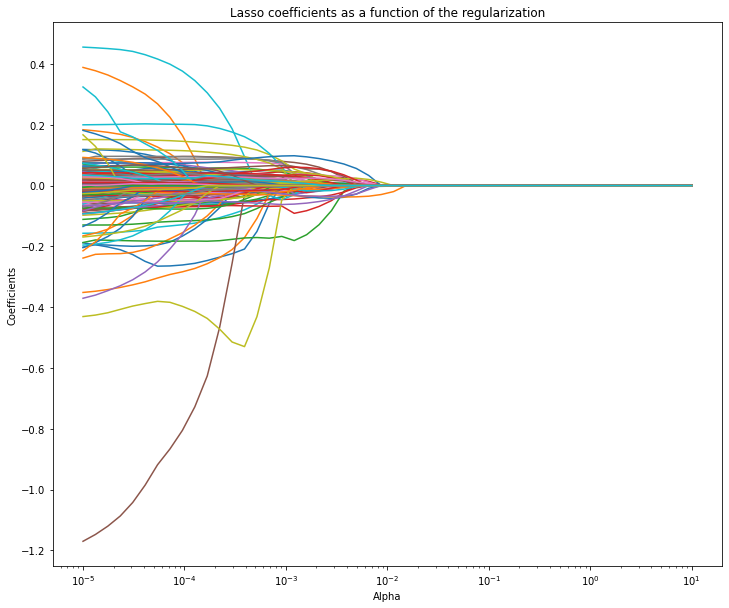

In [190]:
from sklearn.linear_model import Lasso

for a in alphas:
    lasso = Lasso(alpha=a, random_state=88)
    lasso.fit(X_train_lasso, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

### Lasso Hyper-parameter Tuning

In [191]:
alpha_grid = {'alpha': np.logspace(-8, -1, num=50, base=10)}

lasso_cv = GridSearchCV(lasso, alpha_grid, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(X_train_lasso, y_train)

GridSearchCV(cv=10, estimator=Lasso(alpha=10.0, random_state=88),
             param_grid={'alpha': array([1.00000000e-08, 1.38949549e-08, 1.93069773e-08, 2.68269580e-08,
       3.72759372e-08, 5.17947468e-08, 7.19685673e-08, 1.00000000e-07,
       1.38949549e-07, 1.93069773e-07, 2.68269580e-07, 3.72759372e-07,
       5.17947468e-07, 7.19685673e-07, 1.00000000e-06, 1.38949549e-06,
       1.93069773e-06, 2.682...
       1.00000000e-04, 1.38949549e-04, 1.93069773e-04, 2.68269580e-04,
       3.72759372e-04, 5.17947468e-04, 7.19685673e-04, 1.00000000e-03,
       1.38949549e-03, 1.93069773e-03, 2.68269580e-03, 3.72759372e-03,
       5.17947468e-03, 7.19685673e-03, 1.00000000e-02, 1.38949549e-02,
       1.93069773e-02, 2.68269580e-02, 3.72759372e-02, 5.17947468e-02,
       7.19685673e-02, 1.00000000e-01])},
             scoring='neg_mean_squared_error')

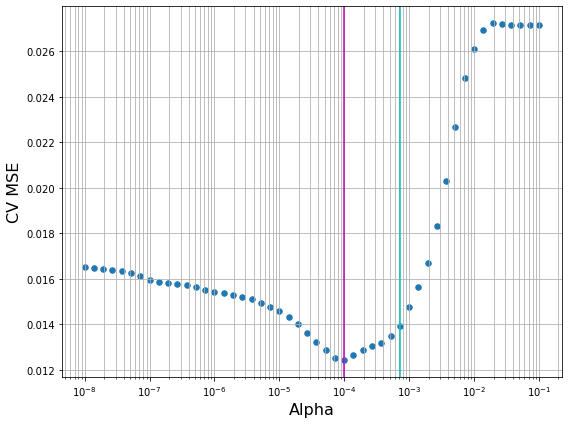

In [192]:
range_alpha = lasso_cv.cv_results_['param_alpha'].data
MSE_scores = lasso_cv.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='lasso',
                                       results=lasso_cv.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [193]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 0.0007196856730011514


### Lasso Refit with One Standard Error Rule

In [195]:
lasso_cv = GridSearchCV(lasso, {'alpha': [x_1se]}, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(X_train_lasso, y_train)

print_metrics(lasso_cv, X_train_lasso, y_train, X_test_lasso, y_test, flag_log_sale_price = True)
#print_metrics(lasso_cv, X_train_lasso, y_train, X_test_lasso, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.9381745864541243
Training MAE 0.06807142360117416
Training RMSE 0.09969864766595599
Out-of-sample R2 0.8912239350637192
Out-of-sample MAE 0.08564915721819216
Out-of-sample RMSE 0.13707914250627806


### Selected Variables

Let's look at some of the variables selected by lasso

In [196]:
cols = X_train_lasso.columns
coefs = lasso_cv.best_estimator_.coef_
sorted(zip(abs(coefs), cols))[-28:]

[(0.03202140833408941, 'BsmtQual_Ex'),
 (0.0333402375085651, 'OverallQual_7'),
 (0.03560010799965305, 'ExterQual_Fa'),
 (0.03604637886181991, 'Fireplaces_2'),
 (0.037639122773175465, 'BldgType_1Fam'),
 (0.04127727236692001, 'OverallQual_1'),
 (0.0426770996407203, 'Artery'),
 (0.04275138872115367, 'MSZoning_RL'),
 (0.04321964020409722, 'Feedr'),
 (0.04596550090692665, 'OverallQual_4'),
 (0.04892648026506765, 'BrkFace'),
 (0.04898428761390456, 'BsmtExposure_Gd'),
 (0.05030787120771149, 'MSZoning_FV'),
 (0.0519218344685834, 'OverallQual_3'),
 (0.05384905608766704, 'GarageCond_TA'),
 (0.060449690086547846, 'SaleCondition_Abnorml'),
 (0.06567535218238112, 'KitchenQual_Ex'),
 (0.06840415826060667, 'OverallCond_4'),
 (0.07188252239684469, 'OverallCond_9'),
 (0.07349680520466008, 'OverallCond_7'),
 (0.07932791686110967, 'OverallQual_8'),
 (0.08247888854511315, 'Neighborhood_Crawfor'),
 (0.08277120450113161, 'OverallCond_8'),
 (0.09500555273563338, 'Functional_Typ'),
 (0.09849778355014256, 'Ove

### Recover Naive Least Squares

We can also recover the predictions for the Naive Least Squares model from the fitted Lasso model by using `alpha = 0`.

Simply recalculate the estimator at `alpha = 0`.

In [197]:
lasso.set_params(alpha=0)
lasso.fit(X_train_lasso, y_train)
lasso.get_params()

{'alpha': 0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 88,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [198]:
print_metrics(lasso, X_train_lasso, y_train, X_test_lasso, y_test, flag_log_sale_price = True)
#print_metrics(lasso, X_train_lasso, y_train, X_test_lasso, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.961299329476342
Training MAE 0.05599065927436059
Training RMSE 0.07887965406526443
Out-of-sample R2 0.8853178081264881
Out-of-sample MAE 0.08570088853176296
Out-of-sample RMSE 0.14075139230894892


## 4. Random Forests

In [199]:
X_train_rf = X_train_poly_wide
X_test_rf = X_test_poly_wide

In [200]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'max_features': [10, 15, 20, 25],
              'n_estimators': [1000]}

rf = RandomForestRegressor(random_state=88, verbose=0)
rf_cv = GridSearchCV(rf, param_grid, scoring='neg_mean_squared_error', cv=10)
rf_cv.fit(X_train_rf, y_train)
rf_cv.best_estimator_

RandomForestRegressor(max_features=25, n_estimators=1000, random_state=88)

Note: The best estimator out of the cross-validation is already computed with the right criteria. Here we don't need to use One Standard Error Rule, or anything refitting of the kind

In [201]:
print_metrics(rf_cv, X_train_rf, y_train, X_test_rf, y_test, flag_log_sale_price = True)
#print_metrics(rf_cv, X_train_rf, y_train, X_test_rf, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.9845908949219764
Training MAE 0.0322001341607104
Training RMSE 0.049773073669253265
Out-of-sample R2 0.8587962078917887
Out-of-sample MAE 0.09655498055770789
Out-of-sample RMSE 0.15618088779344022


## 5. Final Comparison

### Comparison Table - Log(Sale Price)

In [206]:
comparison_data = {
    
    'Naive Linear Regression': ['{:.3f}'.format(OSR2(y_train, y_test, nlr_poly.predict(ames_test_poly))),
                                '{:.4f}'.format(RMSE(y_test, nlr_poly.predict(ames_test_poly))),
                                '{:.3f}'.format(MAE(y_test, nlr_poly.predict(ames_test_poly)))],
    
    'Common Sense Linear Regression': ['{:.3f}'.format(OSR2(y_train, y_test, lr_cs.predict(ames_test))),
                                       '{:.4f}'.format(RMSE(y_test, lr_cs.predict(ames_test))),
                                       '{:.3f}'.format(MAE(y_test, lr_cs.predict(ames_test)))],
    
    'Principal Components Regression': ['{:.3f}'.format(OSR2(y_train, y_test, pcr_cv.predict(X_test_pcr))),
                                        '{:.4f}'.format(RMSE(y_test, pcr_cv.predict(X_test_pcr))),
                                        '{:.3f}'.format(MAE(y_test, pcr_cv.predict(X_test_pcr)))],
    
    'Ridge Regression': ['{:.3f}'.format(OSR2(y_train, y_test, rr_cv.predict(X_test_rr))),
                         '{:.4f}'.format(RMSE(y_test, rr_cv.predict(X_test_rr))),
                         '{:.3f}'.format(MAE(y_test, rr_cv.predict(X_test_rr)))],
    
    'Lasso Regression': ['{:.3f}'.format(OSR2(y_train, y_test, lasso_cv.predict(X_test_lasso))),
                         '{:.4f}'.format(RMSE(y_test, lasso_cv.predict(X_test_lasso))),
                         '{:.3f}'.format(MAE(y_test, lasso_cv.predict(X_test_lasso)))],
    
    'Random Forest Regression': ['{:.3f}'.format(OSR2(y_train, y_test, rf_cv.predict(X_test_rf))),
                                 '{:.4f}'.format(RMSE(y_test, rf_cv.predict(X_test_rf))),
                                 '{:.3f}'.format(MAE(y_test, rf_cv.predict(X_test_rf)))]
}

comparison_table = pd.DataFrame(data=comparison_data, index=['OSR2', 'Out-of-sample RMSE', 'Out-of-sample MAE'])
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])

,Naive Linear Regression,Common Sense Linear Regression,Principal Components Regression,Ridge Regression,Lasso Regression,Random Forest Regression
OSR2,0.829,0.832,0.869,0.888,0.891,0.859
Out-of-sample RMSE,0.1721,0.1701,0.1505,0.1390,0.1371,0.1562
Out-of-sample MAE,0.090,0.119,0.101,0.088,0.086,0.097


### Comparison Table - Sale Price

In [207]:
y_train_exp = y_train.copy().apply(np.exp).reset_index(drop=True)
y_test_exp = y_test.copy().apply(np.exp).reset_index(drop=True)

comparison_data = {
    
    'Naive Linear Regression': ['{:.3f}'.format(OSR2(y_train_exp, y_test_exp,
                                                     pd.Series(nlr_poly.predict(ames_test_poly)).apply(np.exp))),
                                '{:.4f}'.format(RMSE(y_test_exp,
                                                     pd.Series(nlr_poly.predict(ames_test_poly)).apply(np.exp))),
                                '{:.3f}'.format(MAE(y_test_exp,
                                                    pd.Series(nlr_poly.predict(ames_test_poly)).apply(np.exp)))],
    
    'Common Sense Linear Regression': ['{:.3f}'.format(OSR2(y_train_exp, y_test_exp,
                                                            pd.Series(lr_cs.predict(ames_test)).apply(np.exp))),
                                       '{:.4f}'.format(RMSE(y_test_exp,
                                                            pd.Series(lr_cs.predict(ames_test)).apply(np.exp))),
                                       '{:.3f}'.format(MAE(y_test_exp,
                                                           pd.Series(lr_cs.predict(ames_test)).apply(np.exp)))],
    
    
    'Principal Components Regression': ['{:.3f}'.format(OSR2(y_train_exp, y_test_exp,
                                                             pd.Series(pcr_cv.predict(X_test_pcr)).apply(np.exp))),
                                        '{:.4f}'.format(RMSE(y_test_exp,
                                                             pd.Series(pcr_cv.predict(X_test_pcr)).apply(np.exp))),
                                        '{:.3f}'.format(MAE(y_test_exp,
                                                            pd.Series(pcr_cv.predict(X_test_pcr)).apply(np.exp)))],
    
    'Ridge Regression': ['{:.3f}'.format(OSR2(y_train_exp, y_test_exp,
                                              pd.Series(rr_cv.predict(X_test_rr)).apply(np.exp))),
                         '{:.4f}'.format(RMSE(y_test_exp,
                                              pd.Series(rr_cv.predict(X_test_rr)).apply(np.exp))),
                         '{:.3f}'.format(MAE(y_test_exp,
                                             pd.Series(rr_cv.predict(X_test_rr)).apply(np.exp)))],
    
    'Lasso Regression': ['{:.3f}'.format(OSR2(y_train_exp, y_test_exp,
                                              pd.Series(lasso_cv.predict(X_test_lasso)).apply(np.exp))),
                         '{:.4f}'.format(RMSE(y_test_exp,
                                              pd.Series(lasso_cv.predict(X_test_lasso)).apply(np.exp))),
                         '{:.3f}'.format(MAE(y_test_exp,
                                             pd.Series(lasso_cv.predict(X_test_lasso)).apply(np.exp)))],
    
    'Random Forest Regression': ['{:.3f}'.format(OSR2(y_train_exp, y_test_exp,
                                                      pd.Series(rf_cv.predict(X_test_rf)).apply(np.exp))),
                                 '{:.4f}'.format(RMSE(y_test_exp,
                                                      pd.Series(rf_cv.predict(X_test_rf)).apply(np.exp))),
                                 '{:.3f}'.format(MAE(y_test_exp,
                                                     pd.Series(rf_cv.predict(X_test_rf)).apply(np.exp)))]
}

comparison_table = pd.DataFrame(data=comparison_data, index=['OSR2', 'Out-of-sample RMSE', 'Out-of-sample MAE'])
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])

,Naive Linear Regression,Common Sense Linear Regression,Principal Components Regression,Ridge Regression,Lasso Regression,Random Forest Regression
OSR2,0.849,0.869,0.917,0.920,0.926,0.899
Out-of-sample RMSE,30626.9824,28546.8853,22670.6657,22373.3758,21394.8871,25032.1593
Out-of-sample MAE,14919.633,20003.432,16407.585,14452.211,14024.133,16134.520


# References
- [1] [Examples Ridge Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py)
- [2] [Revert dummy encoding, Dec, 2015](https://github.com/pandas-dev/pandas/issues/8745)
- [3] [Best alpha max, Oct, 2019](https://github.com/scikit-learn-contrib/lightning/issues/84)
- [4] [Find nearest, Apr, 2010](https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array)
